<h1 align='center' style='color:purple'>Clustering With K Means</h1>

In [ ]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("Utilities.csv")
df.head()

,Company,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
0,Arizona,1.06,9.2,151,54.4,1.6,9077,0.0,0.628
1,Boston,0.89,10.3,202,57.9,2.2,5088,25.3,1.555
2,Central,1.43,15.4,113,53.0,3.4,9212,0.0,1.058
3,Commonwealth,1.02,11.2,168,56.0,0.3,6423,34.3,0.700
4,NY,1.49,8.8,192,51.2,1.0,3300,15.6,2.044


# EDA

Text(0, 0.5, 'Fuel_Cost')

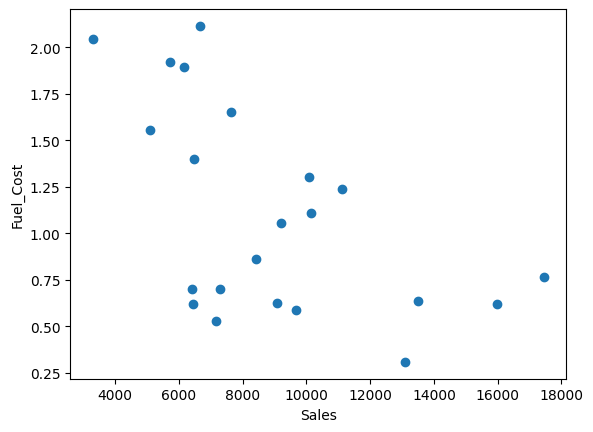

In [ ]:
plt.scatter(df.Sales, df['Fuel_Cost'])
plt.xlabel('Sales')
plt.ylabel('Fuel_Cost')

# KMeans

In [ ]:
km = KMeans(n_clusters=3,init = 'k-means++')
y_predicted = km.fit_predict(df[['Sales', 'Fuel_Cost']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 2, 0, 2, 2, 0, 2, 1, 0, 2, 1, 2, 2, 0, 2, 1, 2, 0, 1, 2, 2, 0],
      dtype=int32)

# Clustering Output Visualization

In [ ]:
df['cluster']=y_predicted
df.head()

,Company,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost,cluster
0,Arizona,1.06,9.2,151,54.4,1.6,9077,0.0,0.628,0
1,Boston,0.89,10.3,202,57.9,2.2,5088,25.3,1.555,2
2,Central,1.43,15.4,113,53.0,3.4,9212,0.0,1.058,0
3,Commonwealth,1.02,11.2,168,56.0,0.3,6423,34.3,0.700,2
4,NY,1.49,8.8,192,51.2,1.0,3300,15.6,2.044,2


In [ ]:
df['cluster']= km.labels_
df.head()

,Company,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost,cluster
0,Arizona,1.06,9.2,151,54.4,1.6,9077,0.0,0.628,0
1,Boston,0.89,10.3,202,57.9,2.2,5088,25.3,1.555,2
2,Central,1.43,15.4,113,53.0,3.4,9212,0.0,1.058,0
3,Commonwealth,1.02,11.2,168,56.0,0.3,6423,34.3,0.700,2
4,NY,1.49,8.8,192,51.2,1.0,3300,15.6,2.044,2


In [ ]:
df.groupby('cluster').describe().T

cluster                    0         1          2
Fixed_charge count  7.000000  4.000000  11.000000
             mean   1.194286  1.042500   1.089091
             std    0.162158  0.197041   0.191909
             min    1.050000  0.750000   0.760000
             25%    1.065000  1.012500   0.990000
...                      ...       ...        ...
Fuel_Cost    min    0.588000  0.309000   0.527000
             25%    0.745000  0.542250   0.701000
             50%    1.058000  0.628000   1.555000
             75%    1.174500  0.669000   1.908500
             max    1.306000  0.768000   2.116000

[64 rows x 3 columns]

In [ ]:
km.cluster_centers_

array([[9.67542857e+03, 9.70142857e-01],
       [1.50052500e+04, 5.83250000e-01],
       [6.21454545e+03, 1.37600000e+00]])

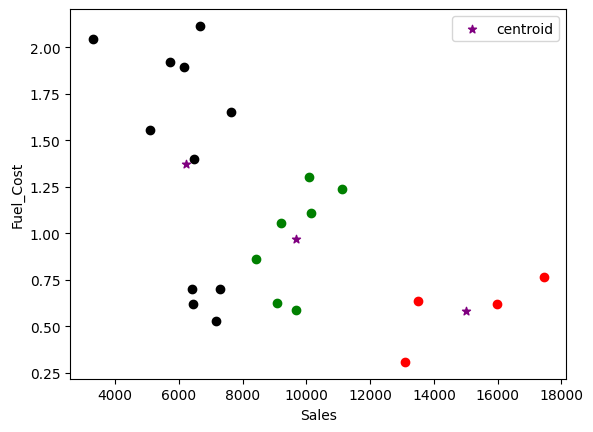

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Sales, df1['Fuel_Cost'], color='green')
plt.scatter(df2.Sales, df2['Fuel_Cost'], color='red')
plt.scatter(df3.Sales, df3['Fuel_Cost'], color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Sales')
plt.ylabel('Fuel_Cost')
plt.legend()

# Preprocessing using min max scaler

In [ ]:
scaler = MinMaxScaler()

scaler.fit(df[['Fuel_Cost']])
df['Fuel_Cost'] = scaler.transform(df[['Fuel_Cost']])

scaler.fit(df[['Sales']])
df['Sales'] = scaler.transform(df[['Sales']])

In [ ]:
df.head()

,Company,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost,cluster
0,Arizona,1.06,9.2,151,54.4,1.6,0.408528,0.0,0.176536,0
1,Boston,0.89,10.3,202,57.9,2.2,0.126441,25.3,0.689541,2
2,Central,1.43,15.4,113,53.0,3.4,0.418075,0.0,0.414499,0
3,Commonwealth,1.02,11.2,168,56.0,0.3,0.220847,34.3,0.216381,2
4,NY,1.49,8.8,192,51.2,1.0,0.000000,15.6,0.960155,2


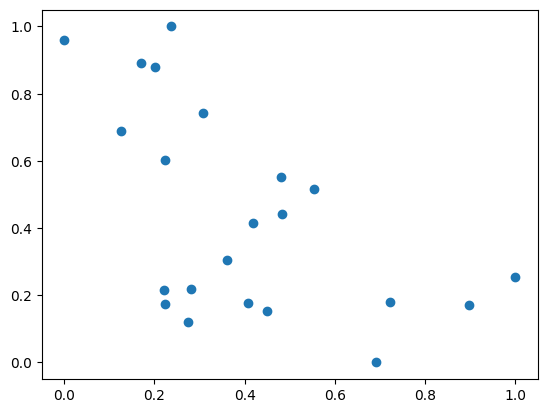

In [ ]:
plt.scatter(df.Sales, df['Fuel_Cost'])

In [ ]:
km = KMeans(n_clusters=3,init = 'k-means++')
y_predicted = km.fit_predict(df[['Sales', 'Fuel_Cost']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 0, 2, 2, 0, 2, 0, 1, 2, 2, 1, 0, 2, 2, 0, 1, 0, 2, 1, 2, 0, 2],
      dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head()

,Company,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost,cluster
0,Arizona,1.06,9.2,151,54.4,1.6,0.408528,0.0,0.176536,2
1,Boston,0.89,10.3,202,57.9,2.2,0.126441,25.3,0.689541,0
2,Central,1.43,15.4,113,53.0,3.4,0.418075,0.0,0.414499,2
3,Commonwealth,1.02,11.2,168,56.0,0.3,0.220847,34.3,0.216381,2
4,NY,1.49,8.8,192,51.2,1.0,0.000000,15.6,0.960155,0


In [ ]:
km.cluster_centers_

array([[0.18099346, 0.82385959],
       [0.82775263, 0.15177089],
       [0.37783107, 0.29903909]])

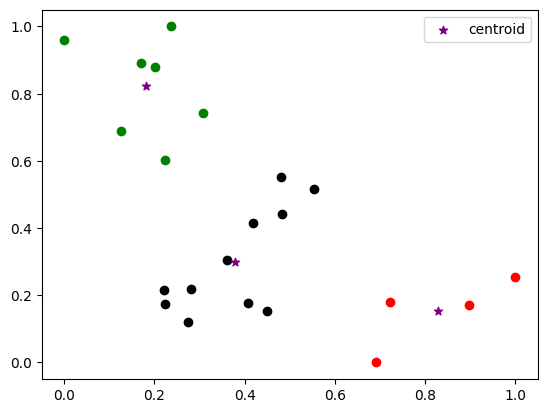

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Sales, df1['Fuel_Cost'], color='green')
plt.scatter(df2.Sales, df2['Fuel_Cost'], color='red')
plt.scatter(df3.Sales, df3['Fuel_Cost'], color='black')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')
plt.legend()

# Elbow Plot to identify best K

In [ ]:
wcss = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k, init='k-means++')
    km.fit(df[['Sales', 'Fuel_Cost']])
    wcss.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

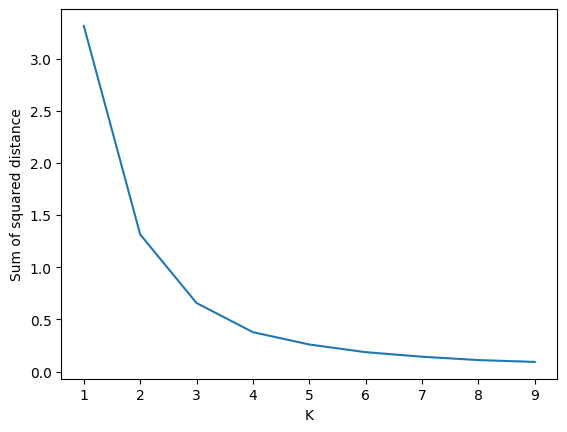

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared distance')
plt.plot(k_rng,wcss)

Optimal K = 3